In [12]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display

In [13]:
# has to be set in order to show the image in notebook
%matplotlib inline 

In [51]:
# y, sr = librosa.load("/Users/muddCS15/Documents/Drumz/1-top-bongo-102.wav")
y, sr = librosa.load("/Users/muddCS15/Documents/Drumz/1-bottom-bongo-102.wav")
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

In [53]:
IPython.display.Audio(data=y, rate=sr) # Preview Audio in notebook

In [54]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [55]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 0.00 beats per minute


In [56]:
# Save the frames to CSV
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
librosa.output.times_csv('beat_times.csv', beat_times)
print('Saving output to beat_times.csv')

Saving output to beat_times.csv


<matplotlib.colorbar.Colorbar instance at 0x10b0f0ef0>

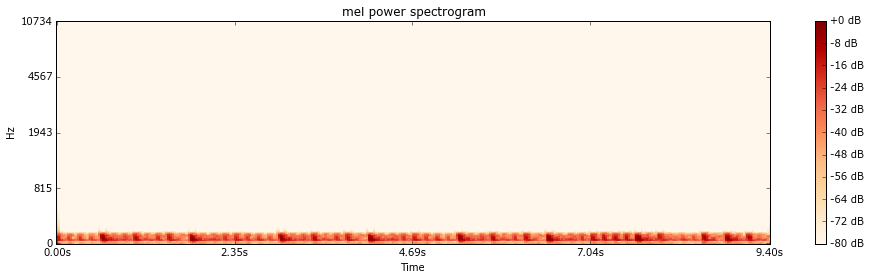

In [57]:
# Extract Mel Spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=256) 

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

plt.figure(figsize=(16,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

# TODO: add the beat_times to the mel power spectrogram

In [58]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

In [59]:
onset_times  = librosa.frames_to_time(onset_frames, sr=sr)
print  "There are %d onsets" % len(onset_times) 
print onset_times
o_env = librosa.onset.onset_strength(y, sr=sr)

There are 57 onsets
[ 0.18575964  0.32507937  0.46439909  0.60371882  0.7662585   0.90557823
  1.04489796  1.20743764  1.34675737  1.4860771   1.78793651  1.95047619
  2.08979592  2.2523356   2.36843537  2.53097506  2.67029478  2.83283447
  2.94893424  3.25079365  3.39011338  3.55265306  3.71519274  3.83129252
  4.13315193  4.29569161  4.43501134  4.59755102  4.73687075  4.87619048
  5.0155102   5.17804989  5.31736961  5.4799093   5.61922902  5.75854875
  5.92108844  6.06040816  6.19972789  6.5015873   6.78022676  6.94276644
  7.08208617  7.2214059   7.38394558  7.52326531  7.66258503  7.82512472
  7.96444444  8.28952381  8.42884354  8.54494331  8.84680272  9.0093424
  9.12544218  9.28798186  9.45052154]


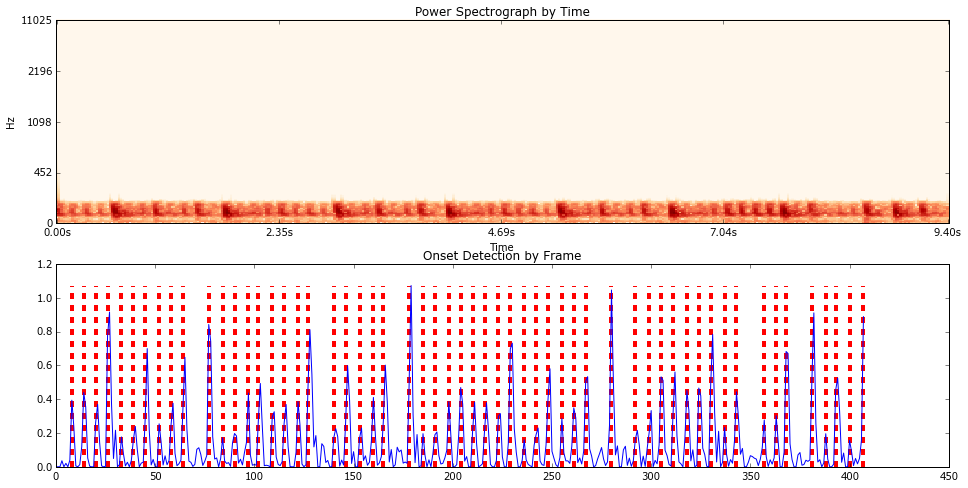

In [60]:
D = np.abs(librosa.stft(y))**2
plt.figure(figsize=(16,8)) 

plt.subplot(2, 1, 1)
plt.title('Power Spectrograph by Time')
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')

plt.subplot(2, 1, 2)
plt.title('Onset Detection by Frame')
plt.plot(o_env, label="Onset strength")
plt.vlines(onset_frames, 0, o_env.max(), color='r', linewidth=4.00, linestyles="--")